<a href="https://colab.research.google.com/github/Sri777harsha/FML/blob/main/K_Nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("/content/drive/MyDrive/IRIS.csv")
print("done")

done


In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
target=data['species']
print(target)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


As the predicting target column is in string data type so we have to convert it into numerical data type so we can change it into numerical by using LabelEncoder which is present in preprocessing module

In [5]:
from sklearn.preprocessing import LabelEncoder as LE

In [6]:
le=LE()
print(target.unique())
data['species']=le.fit_transform(data['species'])
print(data['species'].unique())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


In [7]:
print(data.shape)

(150, 5)


Now we need split the data into train data and test data by using the TrainTestSplit class which is present in model_selection module in sklearn package

In [8]:
x_train,x_test,y_train,y_test=tts(data.drop('species',axis=1),target,test_size=0.2,random_state=423)
print(x_train.shape,x_test.shape)

(120, 4) (30, 4)


Model Training

In [9]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)


In [16]:
con_mat=confusion_matrix(y_test,y_test_pred)
con_mat_train=confusion_matrix(y_train,y_train_pred)



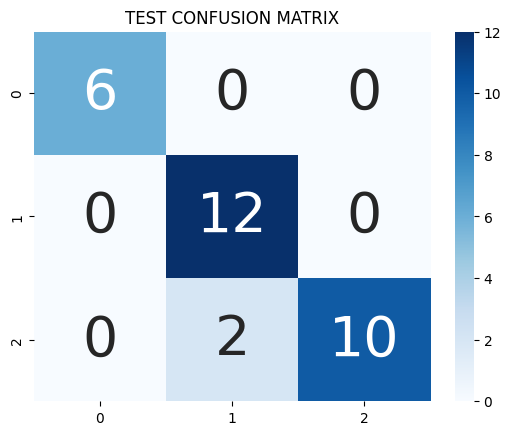

In [12]:
ax=plt.axes()
df_cm=con_mat
sns.heatmap(df_cm,annot=True,annot_kws={"size":40},fmt='d',cmap="Blues",ax=ax)
ax.set_title("TEST CONFUSION MATRIX")
plt.show()

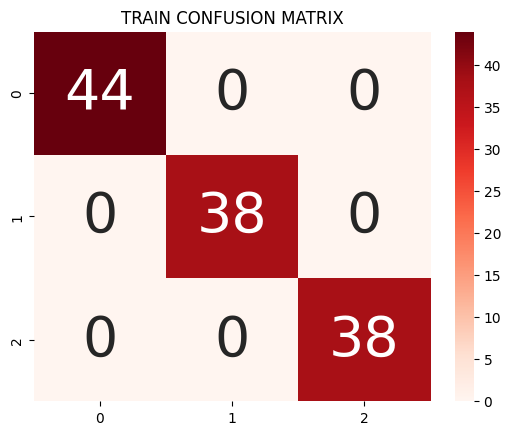

In [17]:
ax=plt.axes()
df_cm=con_mat_train
sns.heatmap(df_cm,annot=True,annot_kws={"size":40},fmt='d',cmap="Reds",ax=ax)
ax.set_title("TRAIN CONFUSION MATRIX")
plt.show()

In [13]:
test_score=classification_report(y_test,y_test_pred)
print(test_score)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.83      0.91        12

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [15]:
train_score=classification_report(y_train,y_train_pred)
print(train_score)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        44
Iris-versicolor       1.00      1.00      1.00        38
 Iris-virginica       1.00      1.00      1.00        38

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



As from the above observations we can conclude that knn is giving best for train data for k value '1'. And also for test data for k value '1', it is giving some less error 